In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

   Feature 1  Feature 2  Class
0   1.228312  -0.757178     -1
1   0.698409  -1.380295     -1
2   2.548817   2.502258      1
3   0.573579  -1.352979     -1
4   0.585900  -1.337457     -1


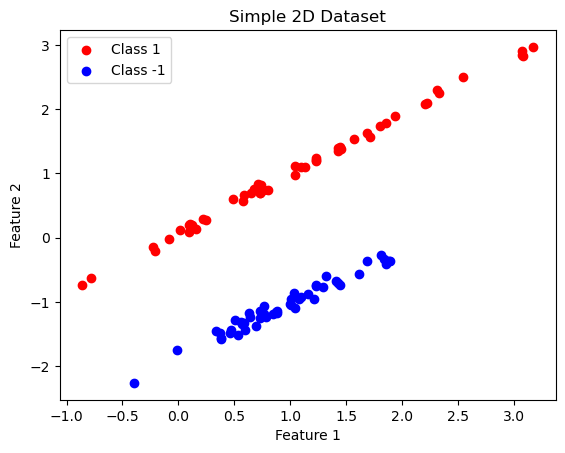

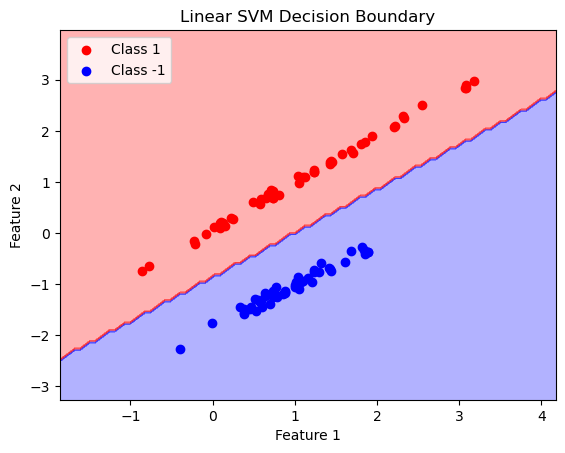

Linear SVM Accuracy: 1.0


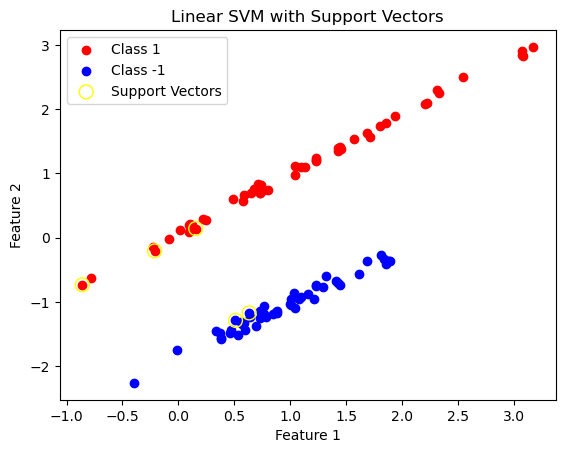

In [21]:
# Generate a simple 2D dataset using sklearn
X, y = datasets.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)
y = np.where(y == 0, -1, 1)  # Adjust labels to be -1 and 1

# Create a DataFrame for better visualization of the dataset
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Class'] = y

# Display the first few rows of the dataset
print(df.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new)
    zz = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, zz, cmap=ListedColormap(['blue', 'red']), alpha=0.3)
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
    plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')
    plt.legend()
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the original dataset
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')
plt.title('Simple 2D Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, linear_svm, 'Linear SVM Decision Boundary')

# Evaluate the model
accuracy = linear_svm.score(X_test, y_test)
print(f'Linear SVM Accuracy: {accuracy}')

# Plot support vectors
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='yellow', label='Support Vectors')
plt.title('Linear SVM with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()